## TRAVEL STOCK PORTFOLIO OPTIMAZATION

### Stock data
Use [yfinance](https://pypi.org/project/yfinance/) library to get the _actual stock data_ from the 20 companies of travel&tourism industry in US stock market.

# Introduction
After a COVID-19-induced two-year break, many experts believe the travel & tourism industry start recovering recently. Investors also begin to consider adding stocks of travel sectors into their portfolios and looking for a travel economy's bounce back. But facing the uncertainty of its future, how can investors optimize their asset combination - minimize risk to achieve a certain return？ By using the Markowitz portfolio model to achieve a travel stock portfolio optimization, our project is willing to answer the question and perform analysis to it.   



# Data Summary

We use [yfinance](https://pypi.org/project/yfinance/) library to get the latest 3 months of _actual stock data_ from the 20 companies of travel industry. To get bigger picture of the whole industry, we choose multiple market leaders that cover different aspects of the travel industry. 

###20 Stocks:

1.   **Booking Holdings (BKNG)** : Online travel portal
2.   **Airbnb (ABNB)**:  Online travel portal
3.   **Expedia Group (EXPE)**: Online travel portal
4.   **Trip.com Group Limited (TCOM)**: Online travel portal
5.   **Tripadvisor Inc (TRIP)**: Online travel portal
6.   **Southwest Airlines (NYSE:LUV)**: Airline company
7.   **Boeing (NYSE:BA)**: Aircraft producer
8.   **Delta Air Lines (DAL)**: Airline company
9.   **Hyatt Hotels Corporation (H)**: Hotel company
10.  **Marriott International (MAR)**:Hotel company
11.  **Royal Caribbean Group (RCL)**: Cruise line company
12.  **Norwegian Cruise Line Holdings Ltd (NCLH)**: Cruise line company
13.  **Carnival Group （CCL）**：Cruise line company
14.  **Avis Budget Group (CAR)**:Car rental company
15.  **Hertz Global Holdings (HTZ)**: Car rental company
16.  **MakeMyTrip Limited (MMYT)**: Online travel portal
17.  **Travel + Leisure Co. (TNL)**: Club & resort company
18.  **The Walt Disney Company(DIS)**: Theme park and hotel company
19.  **American Airlines Group (AAL)**: Airline company
20.  **Sabre Corporation (SABR)**: Travel technology



## Model Formulation
### Parameters

We use the [Greek values](https://en.wikipedia.org/wiki/Greeks_\(finance\)) that are traditional in finance:

- $\delta$: n-element vector measuring the average returns for each stock
- $\sigma$: n x n matrix measuring the covariance among stocks

There is one additional parameter when solving the model parametrically:

- r: target return


### Decision Variables
- $x \ge 0$: n-element vector where each element represents the fraction of the porfolio to invest in each stock

### Objective Function
Minimize the total risk, a convex quadratic function:

\begin{equation}
\min x^t \cdot \sigma \cdot x
\end{equation}

### Constraints

Allocate the entire portfolio: the total investments should be 1.0 (100%), where $e$ is a unit vector (all 1's):

\begin{equation}
e \cdot x = 1
\end{equation}


Return: When we solve the model parametrically for different return values $r$, we add a constraint on the target return:

\begin{equation}
\delta \cdot x = r
\end{equation}

## Python Implementation

In [ ]:
!pip install gurobipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

stocks = ['BKNG', 'LUV', 'ABNB', 'MAR', 'DIS', 'RCL', 'AAL', 'EXPE', 'BA', 'NCLH', 'CCL', 'TRIP', 'HTZ', 'DAL', 'CAR', 
          'MMYT', 'TNL', 'H', 'TCOM', 'SABR']

data = yf.download(stocks, period='3mo')

[*********************100%***********************]  20 of 20 completed


In [ ]:
print(type(data))
print(data)

<class 'pandas.core.frame.DataFrame'>
                          Adj Close                                       \
                                AAL        ABNB          BA         BKNG   
Date                                                                       
2022-07-06 00:00:00-04:00    13.890   92.879997  136.309998  1750.859985   
2022-07-07 00:00:00-04:00    14.100   97.500000  139.970001  1785.920044   
2022-07-08 00:00:00-04:00    13.970   97.349998  139.070007  1769.479980   
2022-07-11 00:00:00-04:00    13.430   95.099998  136.990005  1724.550049   
2022-07-12 00:00:00-04:00    14.770   96.550003  147.149994  1738.250000   
...                             ...         ...         ...          ...   
2022-09-30 00:00:00-04:00    12.040  105.040001  121.080002  1643.209961   
2022-10-03 00:00:00-04:00    11.920  105.000000  126.050003  1678.930054   
2022-10-04 00:00:00-04:00    12.950  110.809998  133.509995  1759.040039   
2022-10-05 00:00:00-04:00    12.870  111.760002  1

### Compute Greeks
Using the downloaded stock data, find the delta (return), sigma (covariance) and standard deviation values for stock prices:

In [ ]:
import numpy as np

closes = np.transpose(np.array(data.Close)) # matrix of daily closing prices
absdiff = np.diff(closes)                   # change in closing price each day
reldiff = np.divide(absdiff, closes[:,:-1]) # relative change in daily closing price
delta = np.mean(reldiff, axis=1)            # mean price change
sigma = np.cov(reldiff)                     # covariance (standard deviations)
std = np.std(reldiff, axis=1)               # standard deviation

## Minimize risk by solving QP model

In [ ]:
import gurobipy as gp
from gurobipy import GRB
from math import sqrt

# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks
portfolio_risk = x @ sigma @ x
m.setObjective(portfolio_risk, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()

Restricted license - for non-production use only - expires 2023-10-25
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 1 rows, 20 columns and 20 nonzeros
Model fingerprint: 0x41ac30cc
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-04, 1e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve time: 0.02s
Presolved: 1 rows, 20 columns, 20 nonzeros
Presolved model has 210 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 19
 AA' NZ     : 1.900e+02
 Factor NZ  : 2.100e+02
 Factor Ops : 2.870e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.28950169e+05 -2.28950169e+05  1.60e+04 6.60e

## Display minimum risk portfolio using Pandas

In [ ]:
import pandas as pd
minrisk_volatility = sqrt(m.ObjVal)
minrisk_return = delta @ x.X
pd.DataFrame(data=np.append(x.X, [minrisk_volatility, minrisk_return]),
             index=stocks + ['Volatility', 'Expected Return'],
             columns=['Minimum Risk Portfolio'])

,Minimum Risk Portfolio
BKNG,7.013269e-08
LUV,8.510661e-08
ABNB,1.118918e-03
MAR,1.346897e-07
DIS,2.509288e-08
RCL,1.669345e-08
AAL,2.421677e-07
EXPE,2.765420e-01
BA,3.664324e-08
NCLH,9.532448e-05


## Compute the efficient frontier
Solve the QP parametrically to find the lowest risk portfolio for different expected returns.

In [ ]:
# Create an expression representing the expected return for the portfolio
portfolio_return = delta @ x
target = m.addConstr(portfolio_return == minrisk_return, 'target')

# Solve for efficient frontier by varying target return
frontier = np.empty((2,0))
for r in np.linspace(delta.min(), delta.max(), 25):
    target[0].rhs = r
    m.optimize()
    frontier = np.append(frontier, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 2 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x58feabcc
Model has 210 quadratic objective terms
Coefficient statistics:
  Matrix range     [6e-05, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [5e-04, 1e-02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-03, 1e+00]
Presolve time: 0.02s
Presolved: 2 rows, 20 columns, 40 nonzeros
Presolved model has 210 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 19
 AA' NZ     : 2.100e+02
 Factor NZ  : 2.310e+02
 Factor Ops : 3.311e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.28352980e+05 -2.28352980e+05  1.55e+04 9.66e-03  1.00e+06     0s
   1   3.94707900e+04 -3.94941896e+04  1.23e+03 7

## Plot results
Use the matplot library to plot the optimized solutions, along with the individual stocks:

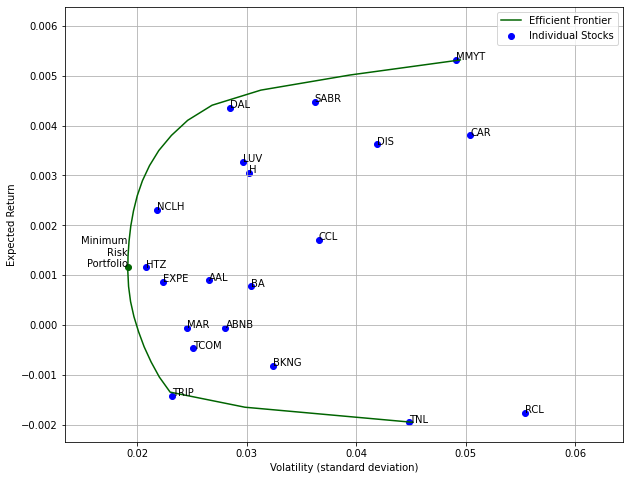

In [ ]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(10,8))

# Plot volatility versus expected return for individual stocks
ax.scatter(x=std, y=delta,
           color='Blue', label='Individual Stocks')
for i, stock in enumerate(stocks):
    ax.annotate(stock, (std[i], delta[i]))

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# Plot efficient frontier
ax.plot(frontier[0], frontier[1], label='Efficient Frontier', color='DarkGreen')

# Format and display the final plot
ax.axis([frontier[0].min()*0.7, frontier[0].max()*1.3, delta.min()*1.2, delta.max()*1.2])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.show()

In [ ]:
import pandas as pd
from statistics import mean
minrisk_volatility = sqrt(m.ObjVal)
average_return = mean(delta)
pd.DataFrame(data=np.append(x.X, [minrisk_volatility, average_return]),
             index=stocks + ['Volatility', 'Expected Return'],
             columns=['Average Return Portfolio'])

,Average Return Portfolio
BKNG,9.264283e-14
LUV,3.866901e-14
ABNB,1.090486e-13
MAR,1.091973e-13
DIS,9.022266e-14
RCL,1.212246e-14
AAL,1.273898e-13
EXPE,1.302429e-13
BA,1.214324e-13
NCLH,1.889303e-13


# Summary
As we showed above, when we looking for a portfolio at a minimum risk, our expected return is around 0.0016, and our minimum variance is around 0.019. There are 3 stocks(TNL, MMYT, TRIP) in the curved line. Most of the stocks are in a safe region. 'EXPE', 'TRIP', 'HTZ', and 'H' are the ones recommended to buy the most. MMT is the aggressive one with high risk and high return; RCL is the one with the highest risk but low return, which is not recommended. When we set our target return to average return, the minimum varience increase to 0.049 and the expected return is 0.0015 and most of the money should buy 'MMT'. Depending on the instability of the whole stock market in the last 3 months, I think the travel stocks perform ok. We are looking for the travel sectors to come back be stronger.